# Markets for Advertisement
- __Request__: Find the two best markets to advertise in
- __Background info__: eLearning company (specializing in web and mobile development, with other coding related offerings as well).
- __Data__: [freeCodeCamp's 2017 New Coder Survey](https://github.com/freeCodeCamp/2017-new-coder-survey)

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

df_raw = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
df = df_raw.copy()
#df = df_raw[df_raw['JobRoleInterest'].notnull()].copy()
# initial column cleanup
yt = df.columns.str.contains('YouTube')
df['youTube'] = df.iloc[:,yt].sum(axis=1)
yt = df.columns.str.contains('YouTube')
col_names = df.iloc[:,yt].columns
df.drop(columns=col_names, inplace=True)

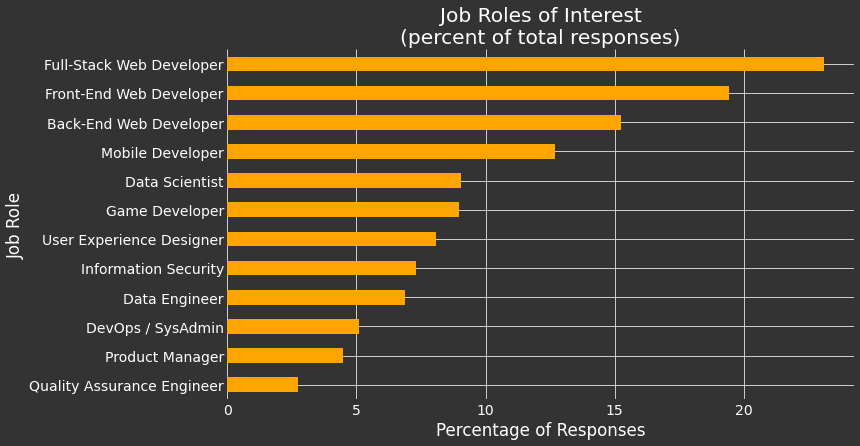

In [2]:
# Generating the freq table of the various responses for job role interests
job_role_freq = {}
job_total = df['JobRoleInterest'].size
for j in df['JobRoleInterest']:
    if pd.isnull(j):
        continue
    for job in j.split(', '):
        if job.strip() in job_role_freq:
            job_role_freq[job.strip()] += 1
        else:
            job_role_freq[job.strip()] = 1

for k, v in job_role_freq.items():
    job_role_freq[k] = round(v / job_total * 100, 2)
# create a plot for the frequency table
fig, ax = plt.subplots(figsize=(10,6), facecolor='#333')
job_freq = pd.Series(data=job_role_freq)
job_freq = job_freq.sort_values(ascending=True)
jf_plot = job_freq.tail(12).plot.barh(color='orange')
plt.ylabel('Job Role', c='white')
plt.xticks(c='white')
plt.yticks(c='white')
plt.xlabel('Percentage of Responses', c='white')
plt.title('Job Roles of Interest\n(percent of total responses)', c='white')
ax.set_facecolor('#333')
for k,v in ax.spines.items():
    ax.spines[k].set_visible(False)
plt.show()

### Adequate sample for our interests
Being that the main focus of the eLearning content is web and app development this is a solid sample to get insights on advertising potential.

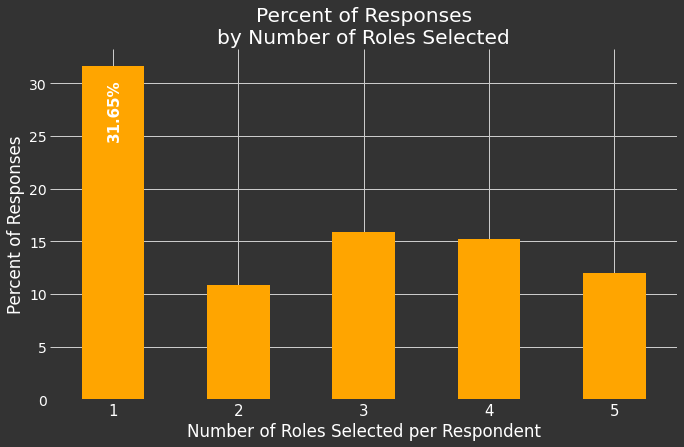

In [3]:
no_nulls = df['JobRoleInterest'].dropna()
split_responses = no_nulls.str.split(',')
options_chosen = split_responses.apply(lambda x: len(x))

single_option_results = split_responses.apply(lambda x: x[0] if len(x) == 1 else np.nan)
single_option_results = single_option_results.str.strip().value_counts(normalize=True)*100

freq_opt_count = options_chosen.value_counts(normalize=True)*100

fig, ax = plt.subplots(figsize=(10,6), facecolor='#333')

freq_opt_count[:5].sort_index().plot.bar(xlabel='Number of Job Roles of Interest', color='orange', rot=0)
plt.ylabel('Percent of Responses', c='white')
plt.xticks(c='white', fontsize=15)
plt.yticks(c='white')
plt.xlabel('Number of Roles Selected per Respondent', c='white')
plt.title('Percent of Responses\nby Number of Roles Selected', c='white')
x, y = ax.patches[0].xy
y = y + 27.5
x = x + .2

ax.annotate(xy=(x, y), text=str(round(freq_opt_count[1], 2))+'%', color='white',
            va='center', ha='left', fontsize=15, fontweight='bold', rotation=90)
ax.set_facecolor('#333')
for k,v in ax.spines.items():
    ax.spines[k].set_visible(False)
plt.show()

### Only 31.65% of respondents selected a single job role they were interested in.
Meaning they had a focused target of the job role they were interested in.
There is however a good deal of overlap between some of the job roles. Such as Full Stack Developer, Front-end dev, back-end dev, or data scientist, and data analyst, or mobile app and game dev.  
  
#### Below is the breakdown of the 31.65% of single answer responses to see what they (those with a single job role in mind) chose.

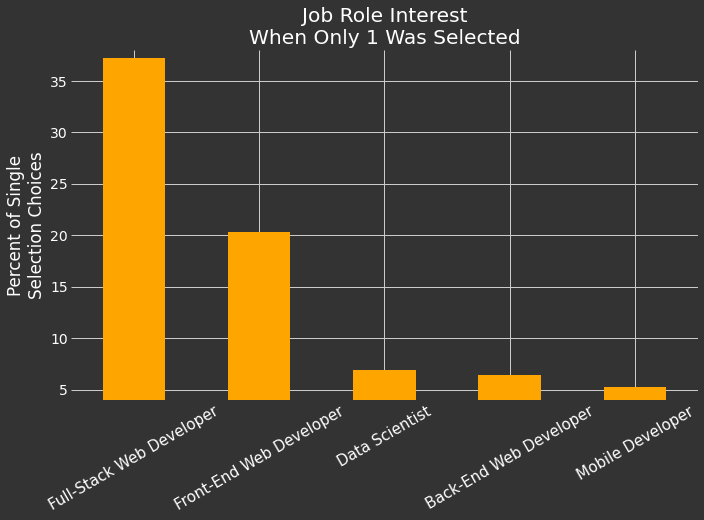

In [4]:
fig, ax = plt.subplots(figsize=(10,6), facecolor='#333')

single_option_results.sort_values(ascending=False)[:5].plot.bar(color='orange', rot=30, ylim=(4, 38))
plt.ylabel('Percent of Single\nSelection Choices', c='white')
plt.xticks(c='white', fontsize=15)
plt.yticks(c='white')

plt.title('Job Role Interest\nWhen Only 1 Was Selected', c='white')

x, y = ax.patches[0].xy
y = y + 27.5
x = x + .2
ax.set_facecolor('#333')
for k,v in ax.spines.items():
    ax.spines[k].set_visible(False)


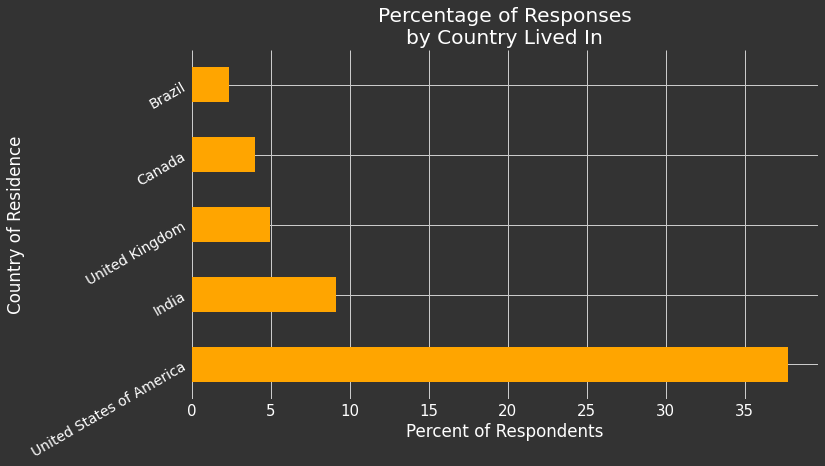

In [5]:
country = df[df['CountryLive'].notnull()]
home_country_count = df['CountryLive'].count()
home_country = df['CountryLive'].value_counts(normalize=True) * 100
# plot home_country
fig, ax = plt.subplots(figsize=(10,6), facecolor='#333')
home_country[:5].plot.barh(color='orange', rot=30)
plt.xlabel('Percent of Respondents', c='white')
plt.xticks(c='white', fontsize=15)
plt.yticks(c='white')
plt.ylabel('Country of Residence', c='white')
plt.title('Percentage of Responses\nby Country Lived In', c='white')
ax.set_facecolor('#333')
for k,v in ax.spines.items():
    ax.spines[k].set_visible(False)

## Top 2 Countries based on representation (aka survey responses)...
1. USA
2. India  
  
However, lets look at how much people in each country have spent on learning and the annual income they reported. So we can focus our efforts on higher potential returns. We will look at only the countries where the money for learning was 20,000 or less, and had more than 100 respondents. Less than 20,000 due to extreme outliers, and more than 100 to have enough data representation for the country.

In [6]:
# Calculate the money for learning per month of programming
df['MonthsProgramming'] = df['MonthsProgramming'].apply(lambda x: x if x > 0 else 1)
df['MoneyPerMonth'] = df['MoneyForLearning'] / df['MonthsProgramming']
# Drop the rows without a JobRoleInterest
df_grp = df[df['JobRoleInterest'].notnull()].copy()
# filter out MoneyForLearning values > $20,000
df_grp = df_grp[df_grp['MoneyForLearning'] <= 20000].copy()
df_limit = df_grp['CountryLive'].value_counts()
drop_list = []
# create a list
for k,v in df_limit.items():
    if v < 100:
        drop_list.append(k)
contenders = df_grp.groupby('CountryLive').mean()
# create list of countries with fewer than 50 respondents and drop them from the dataframe
for i in drop_list:
    contenders = contenders.drop(index=i)
contenders['n_count'] = df_limit
# Filter or the money related columns of interest
money_eval = contenders[['MoneyForLearning', 'MonthsProgramming', 'MoneyPerMonth', 'Income']].round(2).copy()
money_eval.sort_values('MoneyPerMonth', ascending=False)

,MoneyForLearning,MonthsProgramming,MoneyPerMonth,Income
CountryLive,,,,
Australia,1171.52,14.34,352.68,46234.44
United States of America,928.93,13.58,170.66,43474.74
Canada,667.55,11.67,121.54,32227.62
India,461.06,14.07,118.57,39794.82
Poland,372.13,8.82,75.26,16131.71
Germany,235.15,12.97,63.17,33837.93
Brazil,250.20,12.50,56.28,31871.39
United Kingdom,319.60,12.13,44.42,31913.38


## Australia?
We eliminated the outliers (more than \$20000 for learning), and eliminated countries with fewer than 100 responses.  

The table above which shows, for each country, the average amount of money for learning, the average months of programming, money for learning per month, and the average income reported. Australia came out on top for dollars per month, but that doesn't necessarily make it the best due to its lower response rate.  

### Let's further narrow our focus  
Zeroing in on the top 4 from the table above plus the UK (as it has a significant number of responses we can break it down a little further.

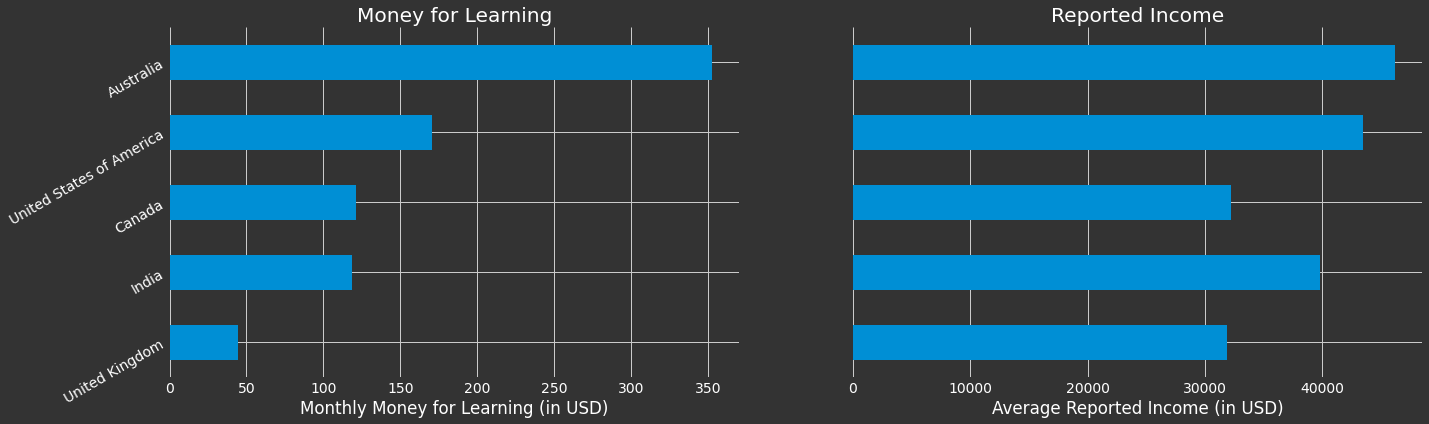

In [7]:
# List of highest potential countries
country_checks = ['Australia', 'United States of America', 'India', 'United Kingdom', 'Canada']
focus_c = contenders.loc[country_checks].copy()
focus_money = focus_c[['MoneyForLearning', 'MonthsProgramming', 'MoneyPerMonth', 'Income']].sort_values('MoneyPerMonth')

fig, ax = plt.subplots(1,2, figsize=(20,6), facecolor='#333')

focus_money['MoneyPerMonth'].plot.barh(rot=30, ax=ax[0])
focus_money['Income'].plot.barh(rot=30, ax=ax[1])
ax[0].set_ylabel("", visible=False)
ax[1].set_ylabel('hh', visible=False)

ax[0].set_xlabel('Monthly Money for Learning (in USD)', c='white')
ax[1].set_xlabel('Average Reported Income (in USD)', c='white')

ax[0].tick_params(colors='white')
ax[1].tick_params(labelleft=False, left=0, colors='white')

ax[0].set_title('Money for Learning', c='white')
ax[1].set_title('Reported Income', c='white')

for a in ax:
    a.set_facecolor('#333')
    for k in a.spines:
        a.spines[k].set_visible(False)

In [8]:
# Function to print out summary stats for each of the 'focus' countries
# outliers determines before -> True or after -> False outliers were removed
# Uncomment the last line for the output.
def print_info_ranges(country_list, col='MoneyForLearning', val_range=(0,50000), outliers=False):  
    if outliers:
        dframe = df.copy()
    else:
        dframe = df_grp.copy()
    for country in country_list:
        spc = '-' * 38 + '\n'
        data = dframe[dframe['CountryLive'] == country]
        data_n = data.shape[0]
        try:
            data = data[data[col] > val_range[0]]
            data =  data[data[col] <= val_range[1]]
        except:
            pass
        print(f'{spc}>{country.upper()}: n = {data_n}')
        print(data[col].describe())

#print_info_ranges(country_checks, col='MoneyPerMonth', val_range=(-1,100000), outliers=True)

## Final Conclusions - Where to Advertise
- The USA should definitely be a focus for advertising
- As for the second country...  
  
Here are some insights:  
- ___India:___
    - Has the second most responses (better representation in the data set).
    - Is behind Canada in the amount of money for learning (4th out of the 5).
    - Has reasonable average income meaning more money to spend. India had the fewest salaries submitted (52 out of the 528 participants). 
- ___Canada:___
    - Lower end of the participant counts, but above 200.
    - Just barely above India in terms of money for learning.
    - Low end of the of the average income.
- ___United Kingdom:___
    - Middle of the pack for responses.
    - Lowest money for learning.
    - Lowest average income.
- ___Australia:___
    - Lowest of the group for participant counts.
    - Highest money for learning.
    - Highest average income.
    
Process of elimination:  
- _United Kingdom_ - __lowest__ income, and __lowest__ monthly money for learning. Sorry UK, but doesn't make the cut.
- _Canada_ - mediocre (just ahead of the UK). Safe to eliminate from the list.
- _India_ - despite high participant counts the average money for learning is right below Canada, and we can't get a great idea for income*
- _Australia_ - just over the 100 responses minimum, but __far higher__ average incomes and money for learning.

```
>AUSTRALIA: n = 112             >AUSTRALIA: n=112
count        51.000000          count      102.000000
mean      46661.215686          mean      1171.519608
min       11000.000000          min          0.000000
max      100000.000000          max      20000.000000
Name: Income                    Name: MoneyForLearning
```
The decision comes down to whether or not the number of responses is equivalent to how many people will view our advertising. If yes, the response rate to the survey, is proportional to our audience then we should simply devote 100% of our advertising money to the USA. If no, the response rate alone doesn't consider growth potential of all markets, then we should allocate our advertising money to 2 or more countries.  
  
#### - 60-75% should be invested on the US market.  
#### - The rest should go to Australia, or should be split between Australia and India.  
  
_Side note, the data for the average income is limited (Na for about half of the responses per country--except for India). Despite the missing info we can still gain some information from it for comparison._  
*_Being that India only had 52 responses for income (at least one of which was \$300,000) it isn't a very good comparison to the rest._   
(below is a quick sanity checker)